In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# delcare Base using automap
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Display the row's columns and data in dictionary format-Measurement
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2cab7b36908>,
 'tobs': 65.0,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1}

In [11]:
# Display the row's columns and data in dictionary format-Station
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2cab7bb39b0>,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168}

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
measurement_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
measurement_date.date

'2017-08-23'

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# 1 Calculate the date one year from the last date in data set.


# 2 Perform a query to retrieve the data and precipitation scores


# 3 Save the query results as a Pandas DataFrame and set the index to the date column


# 4 Sort the dataframe by date


# 5 Use Pandas Plotting with Matplotlib to plot the data




In [14]:
# 1 Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_ago

datetime.date(2016, 8, 23)

In [15]:
# 2 Perform a query to retrieve the data and precipitation scores
#SELECT prcp FROM Measurement(day 2 stu plotting)
precip_data = session.query(Measurement.date, Measurement.prcp).all()


In [16]:
# 3 Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precip_data[:], columns=['date', 'prcp'])
df.set_index('date', inplace=True, )
df.head()

,prcp
date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-06,NaN


In [17]:
# 4 Sort the dataframe by date
df.sort_values(by='date',inplace=True)
df.head()

,prcp
date,
2010-01-01,0.08
2010-01-01,0.21
2010-01-01,0.15
2010-01-01,0.15
2010-01-01,0.05


In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [19]:
#total daily precip all stations
daily_precip = df.groupby(['date']).sum()
daily_precip.head()

,prcp
date,
2010-01-01,1.06
2010-01-02,0.02
2010-01-03,0.00
2010-01-04,0.01
2010-01-05,0.03


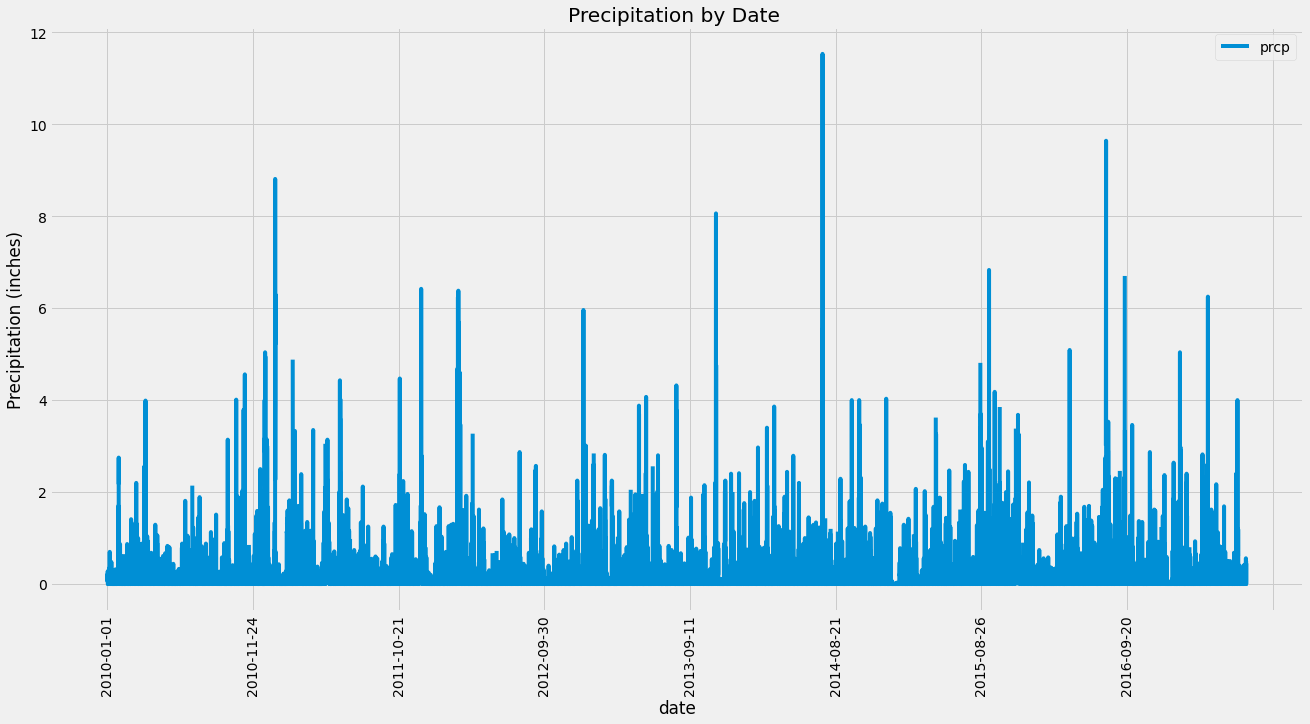

In [20]:
# 5 Use Pandas Plotting with Matplotlib to plot the data
df.plot(title = 'Precipitation by Date ',figsize=(20,10), rot=90)
plt.ylabel('Precipitation (inches)')
plt.show()

# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station.station).count()
stations

9

In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
# chinook day 3 example
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station, 
                        func.min(Measurement.tobs),
                        func.max(Measurement.tobs),
                        func.round(func.avg(Measurement.tobs),2)).\
                filter(Measurement.station=='USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66)]

In [24]:
temps = session.query(Measurement.date, Measurement.tobs).\
                filter(Measurement.station=='USC00519281').all()
temps

[('2010-01-01', 70.0),
 ('2010-01-02', 62.0),
 ('2010-01-03', 74.0),
 ('2010-01-04', 75.0),
 ('2010-01-05', 74.0),
 ('2010-01-06', 76.0),
 ('2010-01-07', 69.0),
 ('2010-01-08', 66.0),
 ('2010-01-09', 70.0),
 ('2010-01-10', 75.0),
 ('2010-01-11', 64.0),
 ('2010-01-12', 60.0),
 ('2010-01-13', 61.0),
 ('2010-01-14', 68.0),
 ('2010-01-15', 64.0),
 ('2010-01-16', 66.0),
 ('2010-01-17', 67.0),
 ('2010-01-18', 70.0),
 ('2010-01-19', 67.0),
 ('2010-01-20', 67.0),
 ('2010-01-21', 69.0),
 ('2010-01-22', 60.0),
 ('2010-01-23', 75.0),
 ('2010-01-24', 75.0),
 ('2010-01-25', 65.0),
 ('2010-01-26', 75.0),
 ('2010-01-27', 69.0),
 ('2010-01-28', 67.0),
 ('2010-01-29', 66.0),
 ('2010-01-30', 69.0),
 ('2010-01-31', 72.0),
 ('2010-02-01', 67.0),
 ('2010-02-02', 65.0),
 ('2010-02-03', 64.0),
 ('2010-02-04', 67.0),
 ('2010-02-05', 67.0),
 ('2010-02-06', 68.0),
 ('2010-02-07', 69.0),
 ('2010-02-08', 66.0),
 ('2010-02-09', 69.0),
 ('2010-02-10', 61.0),
 ('2010-02-11', 71.0),
 ('2010-02-12', 70.0),
 ('2010-02-

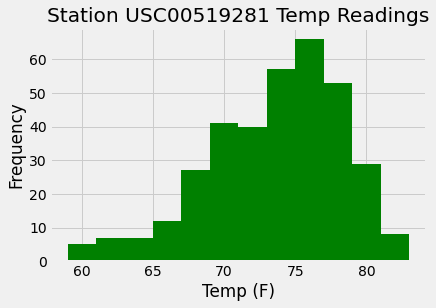

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').\
             filter(Measurement.date>=one_year_ago).all()
#check for temp var
#temperature

temperature = np.ravel(temperature)


plt.hist(temperature, color = 'green', bins =12)
plt.title('Station USC00519281 Temp Readings')
plt.ylabel('Frequency')
plt.xlabel('Temp (F)')
plt.show()

# Close session

In [26]:
# Close Session
session.close()